In [1]:
# Computing
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from functools import partial

# Plotting
import matplotlib
matplotlib.use("cairo")
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib import font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
from bootplot import bootplot

# Image processing
import matplotlib.image as mpimg
import cv2
from PIL import Image

# Display tools
from IPython.display import display

In [2]:
# Combine and show two images one next to each other.
def show_images(image_paths, output_path="", above=False, dpi=300, displayy=True):
    if len(image_paths) > 1:
        images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]
        above = 0 if above else 1
        combined = np.concatenate(images, axis=above)
        Image.fromarray(combined).save(output_path, dpi=(dpi, dpi))
    else:
        output_path=image_paths[0]
    if displayy:
        with Image.open(output_path) as img:
            display(img)

In [3]:
def fn_new(x, k=2.5, t=0.30):
    y = beta.cdf(x, k, k)
    y = (1 - 2 * t) * y + t
    return y

In [4]:
dpi = 300
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['font.size'] = 18
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'DejaVu Sans'
plt.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
plt.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'


In [5]:
x = np.linspace(0, 1, 1001)
y = fn_new(x, k=2.5, t=0.3)

# Points of interest
x1 = 0.25
x2 = 0.75
y1 = fn_new(x1)
y2 = fn_new(x2)

# Plot using axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y, color='#737373', lw=8)

# Labels and theme
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_title(r"$\tau = 0.3,\ k = 2.5$", loc='right')

# Annotations
ax.text(0.35, 0.005, r"$x_1 = \frac{1}{4}$", ha='center', va='center')
ax.text(0.85, 0.005, r"$x_2 = \frac{3}{4}$", ha='center', va='center')
ax.text(-0.025, 0.41, r"$\hat{x}_1 \approx 0.35$", ha='left', va='center')
ax.text(-0.025, 0.71, r"$\hat{x}_2 \approx 0.65$", ha='left', va='center')

# Vertical segments
ax.vlines(x1, ymin=-0.049, ymax=y1, color='black')
ax.vlines(x2, ymin=-0.049, ymax=y2, color='black')

# Horizontal dashed segments
ax.hlines(y1, xmin=-0.049, xmax=x1, color='black', linestyles='dashed')
ax.hlines(y2, xmin=-0.049, xmax=x2, color='black', linestyles='dashed')

# Add points at intersections
ax.plot(x1, y1, 'o', color='black', markersize=15)
ax.plot(x2, y2, 'o', color='black', markersize=15)

ax.plot(x1, -0.05, marker='x', color='black', markersize=10, clip_on=False)
ax.plot(x2, -0.05, marker='x', color='black', markersize=10, clip_on=False)
ax.plot(-0.05, y1, marker='x', color='black', markersize=10, clip_on=False)
ax.plot(-0.05, y2, marker='x', color='black', markersize=10, clip_on=False)

ax.set(xticks=np.arange(0, 1.25, 0.25), yticks=np.arange(0, 1.25, 0.25))

# Allow annotations to be visible outside the plot area
ax.grid(axis='both', linewidth=0.5, color='#E8E8E8', zorder=-50)
ax.set_clip_on(False)
fig.tight_layout()
fig.savefig("transformation_example.pdf", format="pdf", bbox_inches="tight")


In [6]:
dpi = 300
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['font.size'] = 9
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'DejaVu Sans'
plt.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
plt.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from bootplot import bootplot

def make_point_estimate_plot(data_subset, data_full, ax):
    ax.scatter(np.mean(data_subset), 0, color='black')
    ax.set(xlim=(-2, 3), ylim=(-1, 1))
    ax.get_figure().set_constrained_layout(True)

if __name__ == '__main__':
    plt.rcParams['figure.dpi'] = 300
    np.random.seed(0)
    dataset = np.random.randn(300) * 5

    bootplot(
        make_point_estimate_plot,
        dataset,
        m=39,
        output_image_path='point_estimate_plot.png',
        output_size_px=(900, 450),
        verbose=True
    )

Generating plots: 100%|█████████████████████████| 39/39 [00:00<00:00, 39.03it/s]


> Saving bootstrapped image to point_estimate_plot.png


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from bootplot import bootplot

def make_point_estimate_plot(data_subset, data_full, ax):
    ax.scatter(np.mean(data_subset), 0, color='black')
    #ax.set(xlim=(-2, 3), ylim=(-1, 1))
    ax.get_figure().set_constrained_layout(True)

if __name__ == '__main__':
    plt.rcParams['figure.dpi'] = 300
    np.random.seed(0)
    dataset = np.random.randn(300) * 5

    bootplot(
        make_point_estimate_plot,
        dataset,
        m=39,
        output_image_path='point_estimate_plot_noaxes.png',
        output_size_px=(900, 450),
        verbose=True
    )

Generating plots: 100%|█████████████████████████| 39/39 [00:00<00:00, 40.20it/s]


> Saving bootstrapped image to point_estimate_plot_noaxes.png


In [9]:
def make_point_estimate_plot_param(data_subset, data_full, ax, title="Title", **kwargs):
    ax.scatter(np.mean(data_subset), 0, color='black')
    ax.set(xlim=(-2,3), ylim=(-1,1))
    ax.set_title(title, loc='right')
    ax.get_figure().set_constrained_layout(True)
    ax.axis('off')

In [10]:
plot_func_1 = partial(make_point_estimate_plot_param, title=r"$\tau = 0,\ k = 1$")
plot_func_2 = partial(make_point_estimate_plot_param, title=r"$\tau = 0.1,\ k = 0.5$")
plot_func_3 = partial(make_point_estimate_plot_param, title=r"$\tau = 0.1,\ k = 1.5$")
plot_func_4 = partial(make_point_estimate_plot_param, title=r"$\tau = 0.1,\ k = 10^{6}$")
plot_func_5 = partial(make_point_estimate_plot_param, title=r"$\tau = 0.5,\ k = 1$")
plot_func_6 = partial(make_point_estimate_plot_param, title=r"$\tau = 0,\ k = 10^{-6}$")

np.random.seed(0)
dataset = np.random.randn(300) * 5
rng_state_after_dataset = np.random.get_state()


mat = bootplot(
    plot_func_1,
    dataset,
    m=39,
    output_image_path='plot1.png',
    output_size_px=(900,450),
    verbose=True,
    threshold=0,
    k=1
)

np.random.set_state(rng_state_after_dataset)
mat = bootplot(
    plot_func_2,
    dataset,
    m=39,
    output_image_path='plot2.png',
    output_size_px=(900,450),
    verbose=True,
    threshold=0.1,
    k=0.5
)

np.random.set_state(rng_state_after_dataset)
mat = bootplot(
    plot_func_3,
    dataset,
    m=39,
    output_image_path='plot3.png',
    output_size_px=(900,450),
    verbose=True,
    threshold=0.1,
    k=1.5
)

np.random.set_state(rng_state_after_dataset)
mat = bootplot(
    plot_func_4,
    dataset,
    m=39,
    output_image_path='plot4.png',
    output_size_px=(900,450),
    verbose=True,
    threshold=0.1,
    k=100000
)

np.random.set_state(rng_state_after_dataset)
mat = bootplot(
    plot_func_5,
    dataset,
    m=39,
    output_image_path='plot5.png',
    output_size_px=(900,450),
    verbose=True,
    threshold=0.5,
    k=1
)

np.random.set_state(rng_state_after_dataset)
mat = bootplot(
    plot_func_6,
    dataset,
    m=39,
    output_image_path='plot6.png',
    output_size_px=(900,450),
    verbose=True,
    threshold=0,
    k=0.000001
)


Generating plots: 100%|█████████████████████████| 39/39 [00:00<00:00, 57.08it/s]


> Saving bootstrapped image to plot1.png


Generating plots: 100%|█████████████████████████| 39/39 [00:00<00:00, 57.06it/s]


> Saving bootstrapped image to plot2.png


Generating plots: 100%|█████████████████████████| 39/39 [00:00<00:00, 57.75it/s]


> Saving bootstrapped image to plot3.png


Generating plots: 100%|█████████████████████████| 39/39 [00:00<00:00, 57.70it/s]


> Saving bootstrapped image to plot4.png


Generating plots: 100%|█████████████████████████| 39/39 [00:00<00:00, 57.76it/s]


> Saving bootstrapped image to plot5.png


Generating plots: 100%|█████████████████████████| 39/39 [00:00<00:00, 57.76it/s]


> Saving bootstrapped image to plot6.png


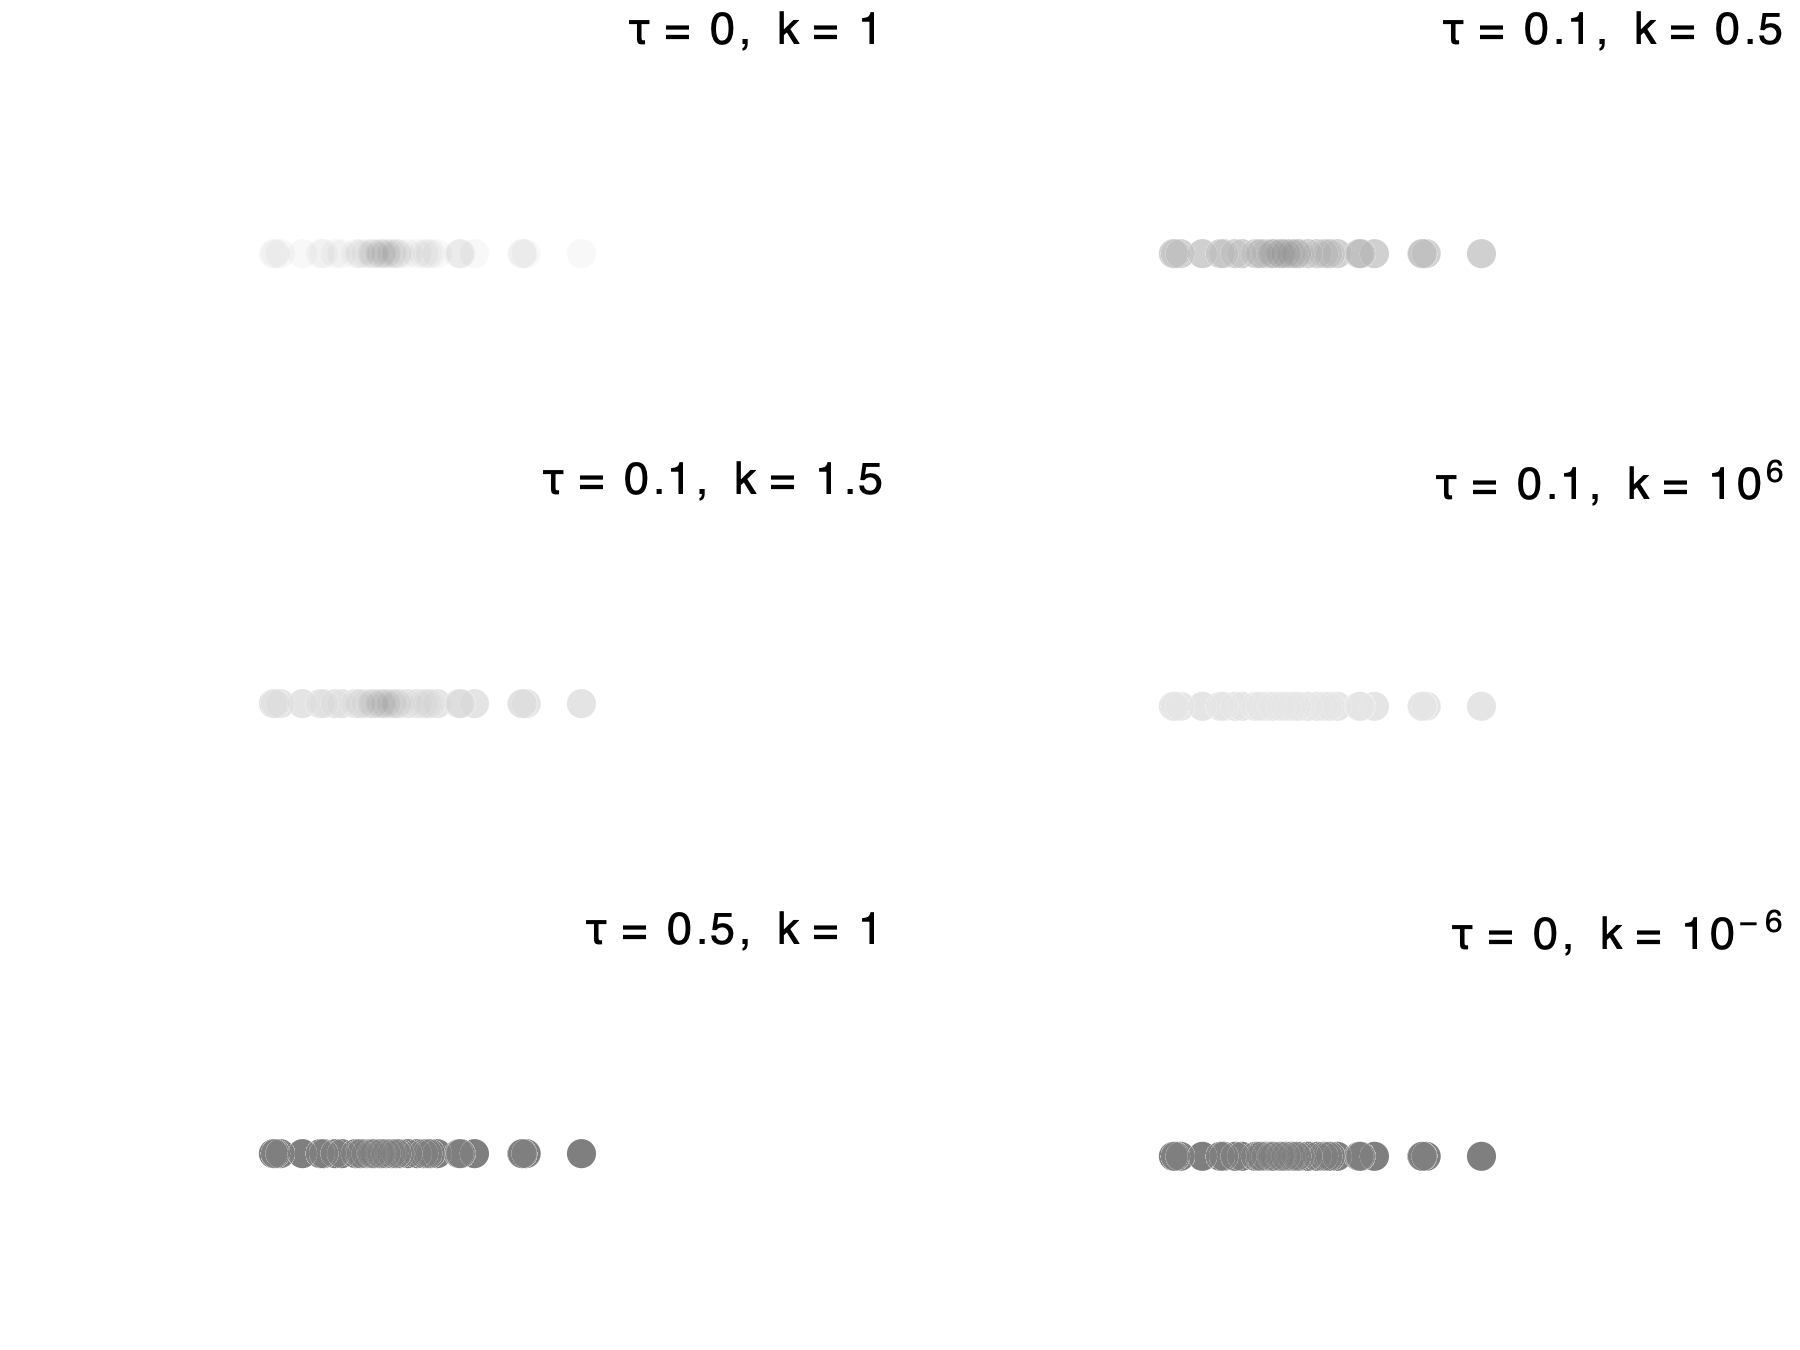

In [11]:
show_images(
        [f'plot1.png', f'plot2.png'],
        f'plot12.png', displayy=False
    )
show_images(
        [f'plot3.png', f'plot4.png'],
        f'plot34.png', displayy=False
    )

show_images(
        [f'plot5.png', f'plot6.png'],
        f'plot56.png', displayy=False
    )

show_images(
        [f'plot12.png', f'plot34.png', f'plot56.png'],
        f'plot_parameters.png', above=True
    )